<h1 style='font-weight: bold; text-align: center;'>Consumo de cerveja - São Paulo (2015)</h1>

<img src="https://besthqwallpapers.com/Temp/9-6-2020/4k-beer-texture-liquid-textures-beer-with-foam-texture-beer-foam-besthqwallpapers.com-1366x768.jpg"></img>

<h2 style='font-weight: bold; text-align: center;'>Introdução</h2>
<h3>Dataset</h3>
<p style='text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

<h3>Variáveis:</h3>
<ul style='text-align: justify;'>
    <li><b>Data</b></li>
    <li><b>Temperatura Média (°C)</b></li>
    <li><b>Temperatura Mínima (°C)</b></li>
    <li><b>Temperatura Máxima (°C)</b></li>
    <li><b>Precipitação (mm)</b></li>
    <li><b>Final de Semana (1 = Sim; 0 = Não)</b></li>
    <li><b>Consumo de Cerveja (litros)</b></li>
</ul>

<h3>Fonte:</h3>
<a href="https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo">https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo</a>

<h2 style='font-weight: bold; text-align: center;'>Importação de pacotes</h2>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

<h2 style='font-weight: bold; text-align: center;'>Carregando a base de dados</h2>

In [2]:
dados = pd.read_csv('dados/Consumo_cerveja.csv', thousands='.', decimal=',')

<h2 style='font-weight: bold; text-align: center;'>Verificando os dados</h2>

In [3]:
dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dados.shape

(941, 7)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


<h3>Removendo os NaN</h3>

In [6]:
dados = dados.dropna()

<h3>Alterando tipos de dados</h3>

In [7]:
dados['Final de Semana'] = dados['Final de Semana'].astype(int)
dados['Data'] = pd.to_datetime(dados['Data'])

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    int32         
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


In [9]:
dados.shape

(365, 7)

In [10]:
dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900.0
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32307.0
361,2015-12-28,22.64,21.1,26.7,0.0,0,26095.0
362,2015-12-29,21.68,20.3,24.1,10.3,0,22309.0
363,2015-12-30,21.38,19.3,22.4,6.3,0,20467.0


Os dados abrangem todos os dias de 2015, sendo a linha zero o dia 1 de janeiro e a linha 364 o dia 31 de dezembro

<h2 style='font-weight: bold; text-align: center;'>Análise Exploratória</h2>

<h3>Estatísticas descritivas</h3>

In [11]:
dados.describe().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


<h3>Matriz de correlação</h3>

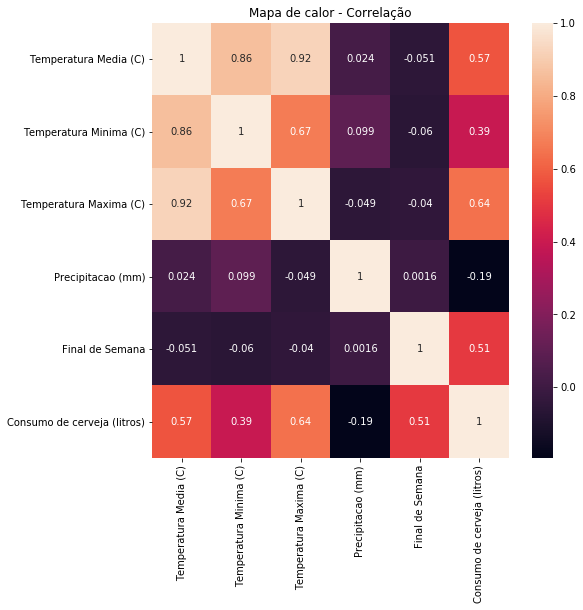

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(dados.corr(),annot=True)
plt.title("Mapa de calor - Correlação")
plt.show()

<h3>Plotando a variável dependente (y)</h3>

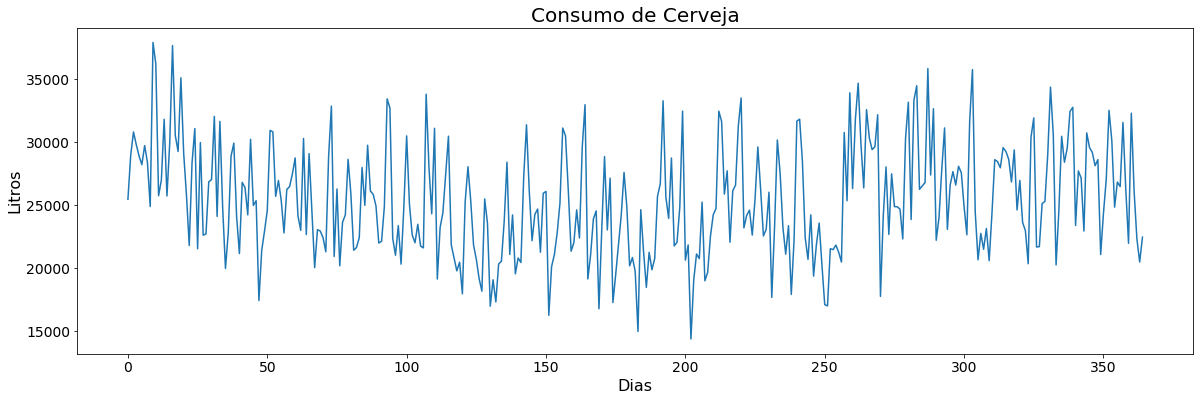

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['Consumo de cerveja (litros)'].plot(fontsize=14)

<h3>Box plot da variável dependente (y)</h3>

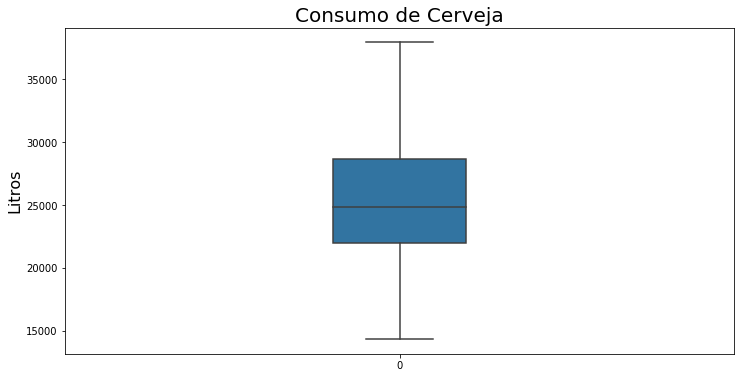

In [14]:
ax = sns.boxplot(data=dados['Consumo de cerveja (litros)'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

<h3>Investigando a variável dependente (y) separando por fim de semana</h3>

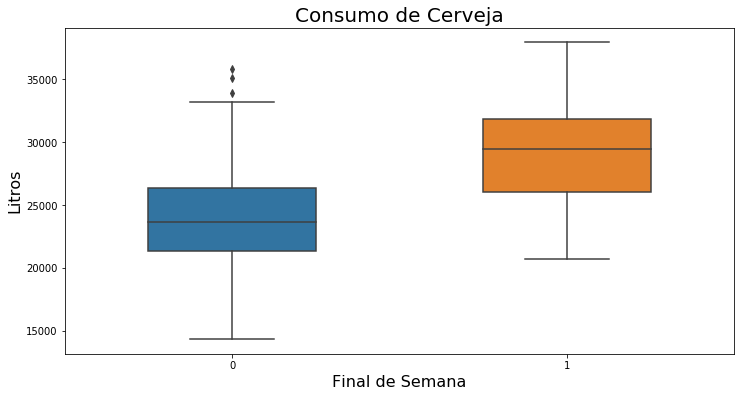

In [15]:
ax = sns.boxplot(y='Consumo de cerveja (litros)', x='Final de Semana', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

Podemos observar pelo gráfico acima que o consumo de cerveja é muito maior no fim de semana

<h3>Distribuição de frequências da variável dependente (y)</h3>

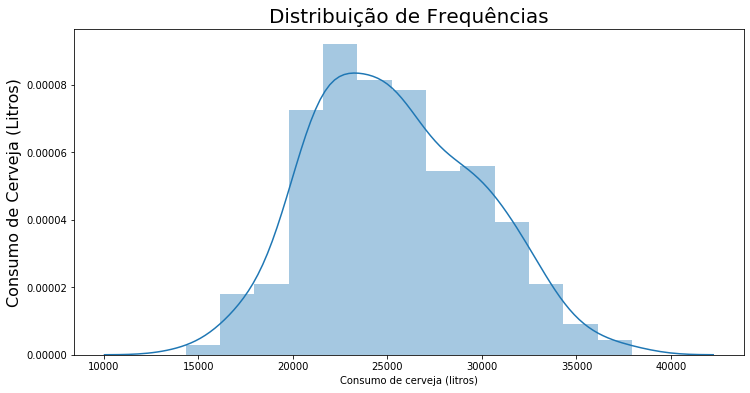

In [16]:
ax = sns.distplot(dados['Consumo de cerveja (litros)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax

<h3>Gráficos de dispersão entre as variáveis do dataset Variável Dependente X Variáveis Explicativas</h3>

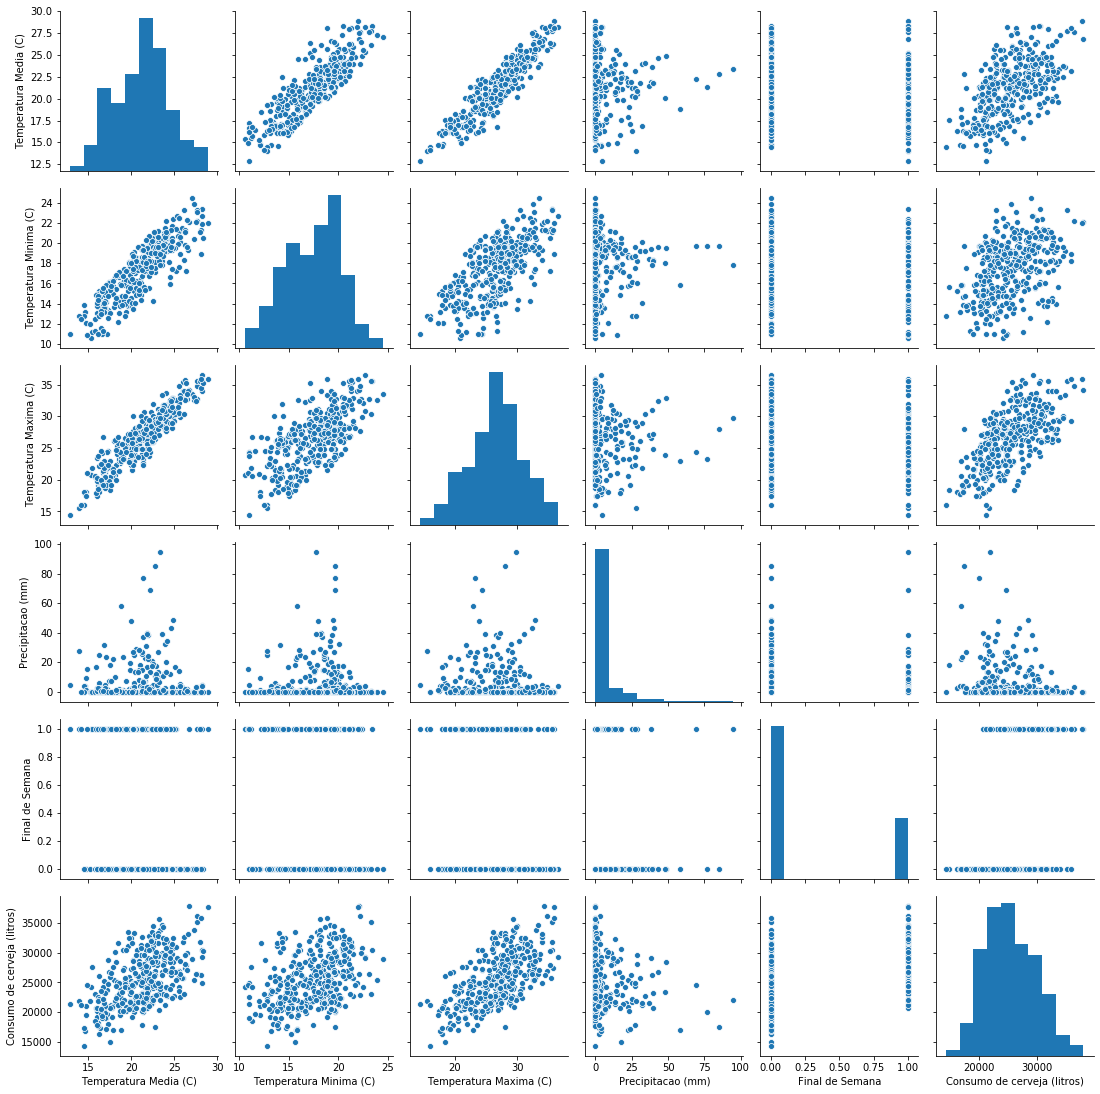

In [17]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

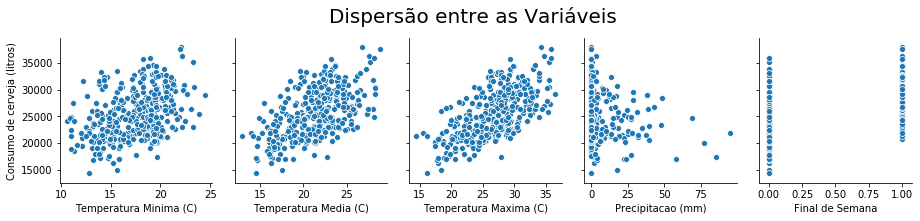

In [18]:
ax = sns.pairplot(dados, y_vars='Consumo de cerveja (litros)', x_vars=['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.15)
ax

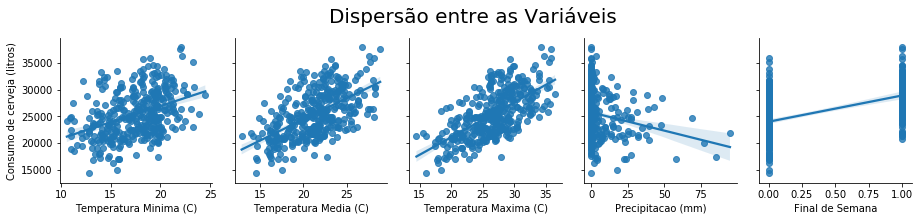

In [19]:
ax = sns.pairplot(dados, y_vars='Consumo de cerveja (litros)', x_vars=['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.15)
ax

<h3>Variável Dependente X Variáveis Explicativas (lmplot)</h3>

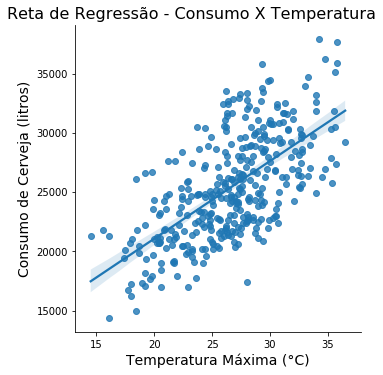

In [20]:
#reta de regressão com a gráfica de dispersão
ax = sns.lmplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

<h3>Plotando um lmplot separando por fim de semana</h3>

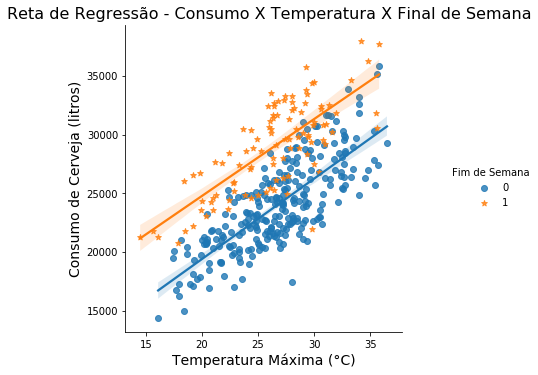

In [21]:
ax = sns.lmplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=dados, hue="Final de Semana", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

<h1 style='font-weight: bold; text-align: center;'> - Modelo Preditivo - </h1>

<h1 style='font-weight: bold; text-align: center;'>Regresão Linear</h1>

<h3>Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)</h3>

In [22]:
y = dados['Consumo de cerveja (litros)']

<h3>Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)</h3>

In [23]:
X = dados[['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]

<h3>Criando os datasets de treino e de teste</h3>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

<h3>Verificando os tamanhos dos arquivos gerados pela função train_test_split</h3>

In [25]:
X_train.shape

(255, 3)

In [26]:
X_test.shape

(110, 3)

In [27]:
X_train.shape[0] + X_test.shape[0]

365

In [28]:
X.shape[0] * 0.3

109.5

In [29]:
X.shape[0] * 0.7

255.49999999999997

<h3>Instanciando a classe LinearRegression()</h3>

In [30]:
modelo = LinearRegression()

<h3>Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)</h3>

In [31]:
modelo.fit(X_train, y_train)

LinearRegression()

<h3>Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO</h3>

In [32]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


<h3>Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"</h3>

In [33]:
y_previsto = modelo.predict(X_test)

<h3>Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo</h3>

In [34]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


<h1 style='font-weight: bold; text-align: center;'>Obtendo Previsões Pontuais</h1>

## Dados de entrada

In [35]:
entrada = X_test[0:1]
entrada

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana
5,30.5,12.2,0


## Gerando previsão pontual

In [36]:
modelo.predict(entrada)[0].round(2)

26094.9

Significa que considerando os dados de entrada Temperatura Maxima (C) = 30.5, Precipitacao (mm) = 12.2 e Final de Semana = 0, a previsão de consumo de cerveja é de 26.09 litros

## Criando um simulador simples

In [37]:
#alterar os valores para gerar novas previsões de consumo
temp_max=31
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

32579.90 litros


<h1 style='font-weight: bold; text-align: center;'>Interpretação dos Coeficientes Estimados</h1>

<h3>Obtendo o intercepto do modelo</h3>

<p>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando as variáveis <b>Temperatura Máxima</b>, <b>Precipitação</b> e <b>Final de Semana</b> são iguais a zero.</p>

Significa que desconsiderando as variáveis explicativas, a média da variável dependente (Consumo) é de 5.95

In [38]:
#verificando o intercepto no simulador
temp_max=0
chuva=0
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

5951.98 litros


In [39]:
type(modelo.intercept_)

numpy.float64

<h3>Obtendo os coeficientes de regressão</h3>

In [40]:
modelo.coef_.round(2)

array([ 684.74,  -60.78, 5401.08])

Significa que cada grau da temperatuda altera o consumo em 684.74, cada milímetro de precipitação, alterado o consumo em -60.78 e o fim de semana altera o consumo em 5401.08

In [41]:
type(modelo.coef_)

numpy.ndarray

<h3>Confirmando a ordem das variáveis explicativas no DataFrame</h3>

In [42]:
X.columns

Index(['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'], dtype='object')

<h3>Criando uma lista com os nomes das variáveis do modelo</h3>

In [43]:
index=['Intercepto', 'Temperatura Máxima', 'Precipitação (mm)', 'Final de Semana']

<h3>Criando um DataFrame para armazenar os coeficientes do modelo</h3>

In [44]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Precipitação (mm),-60.782435
Final de Semana,5401.083339


<h3>Interpretação dos Coeficientes Estimados</h3>

<p style='line-height: 2;text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='line-height: 2;text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='line-height: 2;text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='line-height: 2;text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

<h1 style='font-weight: bold; text-align: center;'>Análises Gráficas das Previsões do Modelo</h1>

<h3>Gerando as previsões do modelo para os dados de TREINO</h3>

In [45]:
y_previsto_train = modelo.predict(X_train)

<h3>Gráfico de dispersão entre valor estimado e valor real</h3>

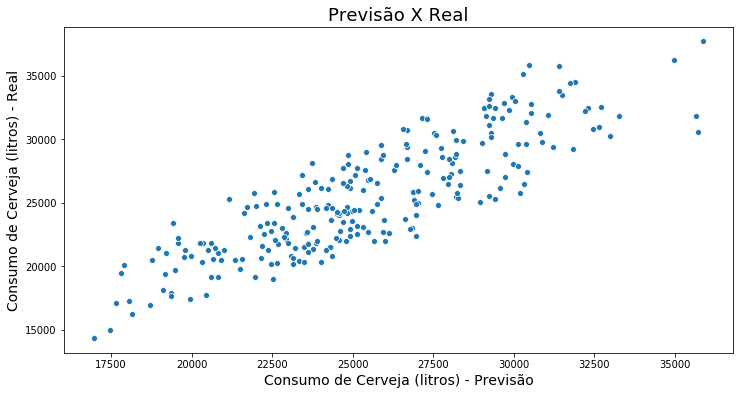

In [46]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

<h3>Obtendo os resíduos</h3>

In [47]:
residuo = y_train - y_previsto_train

<h3>Gráfico de dispersão entre valor estimado e resíduos</h3>

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

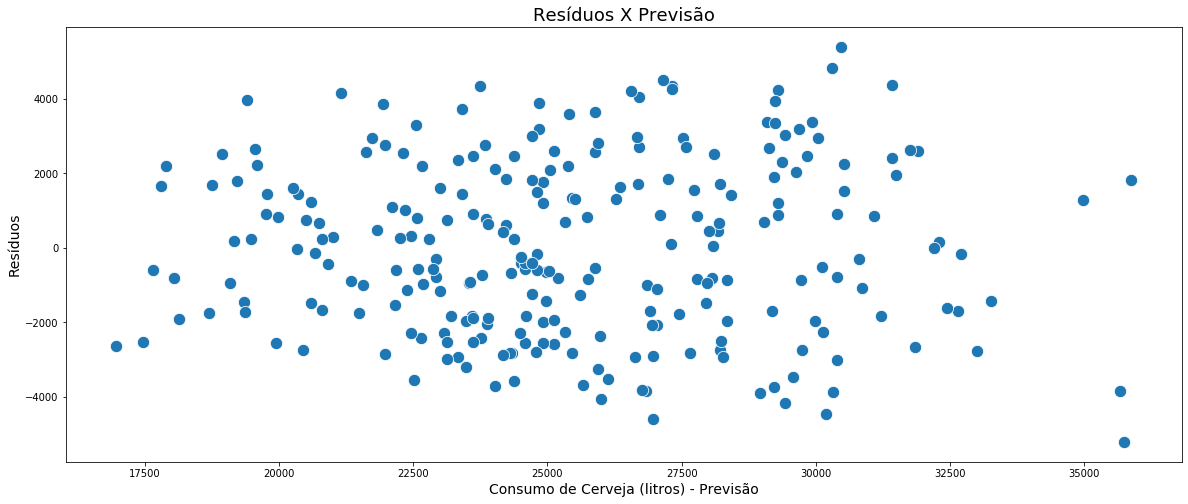

In [48]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<h3>Plotando a distribuição de frequências dos resíduos</h3>

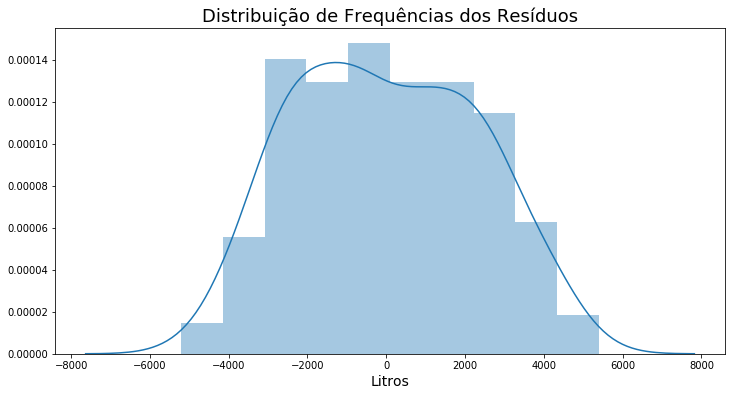

In [49]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

<h1 style='font-weight: bold; text-align: center;'>Salvando e Carregando o Modelo Estimado</h1>

<h3>Dados de entrada</h3>

In [50]:
X_test[0:1]

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana
5,30.5,12.2,0


In [51]:
entrada = X_test[0:1]

<h3>Gerando previsão pontual</h3>

In [52]:
modelo.predict(entrada)[0].round(2)

26094.9

<h3>Criando um simulador simples</h3>

In [53]:
temp_max=37
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

36688.32 litros


<h3>Salvando o modelo estimado</h3>

In [54]:
import pickle

In [55]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()